Importing the libraries and Loading the dataset

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("hw2 .csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources
0,Afghanistan,2015,Low/Middle Income,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,584.259210,33736494.0,17.2,17.3,0.479
1,Afghanistan,2014,Low/Middle Income,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,612.696514,327582.0,17.5,17.5,0.476
2,Afghanistan,2013,Low/Middle Income,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,631.744976,31731688.0,17.7,17.7,0.470
3,Afghanistan,2012,Low/Middle Income,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,669.959000,3696958.0,17.9,18.0,0.463
4,Afghanistan,2011,Low/Middle Income,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,63.537231,2978599.0,18.2,18.2,0.454


Checking the shape ie.Number of Rows and Columns in the dataset [Dimensions of the Dataset]

In [82]:
df.shape

(2938, 18)

Data Cleaning

Let's Check if there is any null values present in the dataset

In [83]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
Polio                               19
Total expenditure                  226
GDP                                448
Population                         652
 Thinness  10-19 years              34
 Thinness 5-9 years                 34
Income composition of resources    167
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

Handling the null values by means of mean value imputation

In [85]:
cols_with_null_values = df.columns[df.isnull().any()].to_list()

for i in cols_with_null_values:
    df[i] = df[i].fillna(df[i].mean())


In [86]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
Polio                              0
Total expenditure                  0
GDP                                0
Population                         0
 Thinness  10-19 years             0
 Thinness 5-9 years                0
Income composition of resources    0
dtype: int64

Handled all the null values and now there's no null values in the dataset

Normalizing / Standardizing the Numerical columns present in the dataset for fairness

In [87]:
# # Here I'm standardizing the data in the range of 0 to 1
# # Here the year column is not going to contribute anything for the prediction column so I'm dropping it from the numerical columns that I took

numerical_dtype_columns = df.select_dtypes(include=[np.number]).columns

for i in numerical_dtype_columns:
    mean = df[i].mean()
    sd = df[i].std()

# Standardization formula (x - mu)/sigma

    df[i] = (df[i] - mean) / sd 

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   float64
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   Infant deaths                    2938 non-null   float64
 6   Alcohol                          2938 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   float64
 10   BMI                             2938 non-null   float64
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

Label encoding of the 'status' and 'country' columns - Here the country column consists of 193 unique values since it will be useful to process the information in text rather than processing it using the text

In [89]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])
df['Country'] = label_encoder.fit_transform(df['Country'])

In [90]:
num_unique_countries = df['Country'].nunique()
num_unique_countries


193

ii) Data Exploration

- Visualizing the correlation between the numerical features present in the dataset, except the 'year' column as it won't have any relationship with the features and we cannot encode it properly to make a relationship with other variables.
- Here visualizing a 15x15 correlation matrix using .corr() function and the method used here is 'pearson correlation' 
- By using the matplotlib library, i visualized the correlation matrix in the form of a heatmap. In the heatmap, the color scale tells how much a feature is correlated with all other numerical features in the dataset.

In [91]:
numerical_columns = [col for col in numerical_dtype_columns if col not in ['Country', 'Status']]
# Pearson Correlation Coefficient
correlation_matrix = df[numerical_columns].corr(method='pearson')
correlation_matrix


,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,0.093820,0.081860,0.093351,0.014951,-0.047592,-0.050627,0.236333
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,0.461574,0.207981,0.430493,-0.019638,-0.472162,-0.466629,0.692483
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,-0.272694,-0.110875,-0.277053,-0.012501,0.299863,0.305366,-0.440062
Infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,-0.170674,-0.126564,-0.107109,0.548522,0.465590,0.471228,-0.143663
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,0.213744,0.294898,0.318591,-0.030765,-0.416946,-0.405881,0.416099
Percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,0.147203,0.173414,0.888140,-0.024648,-0.251190,-0.252725,0.380374
Hepatitis B,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,0.408519,0.050084,0.062318,-0.109811,-0.105144,-0.108334,0.150992
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,-0.136146,-0.104569,-0.068060,0.236250,0.224742,0.221007,-0.115764
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,0.282156,0.231814,0.276645,-0.063238,-0.532025,-0.538911,0.479837
Polio,0.093820,0.461574,-0.272694,-0.170674,0.213744,0.147203,0.408519,-0.136146,0.282156,1.000000,0.130129,0.193980,-0.034882,-0.219938,-0.220710,0.355398


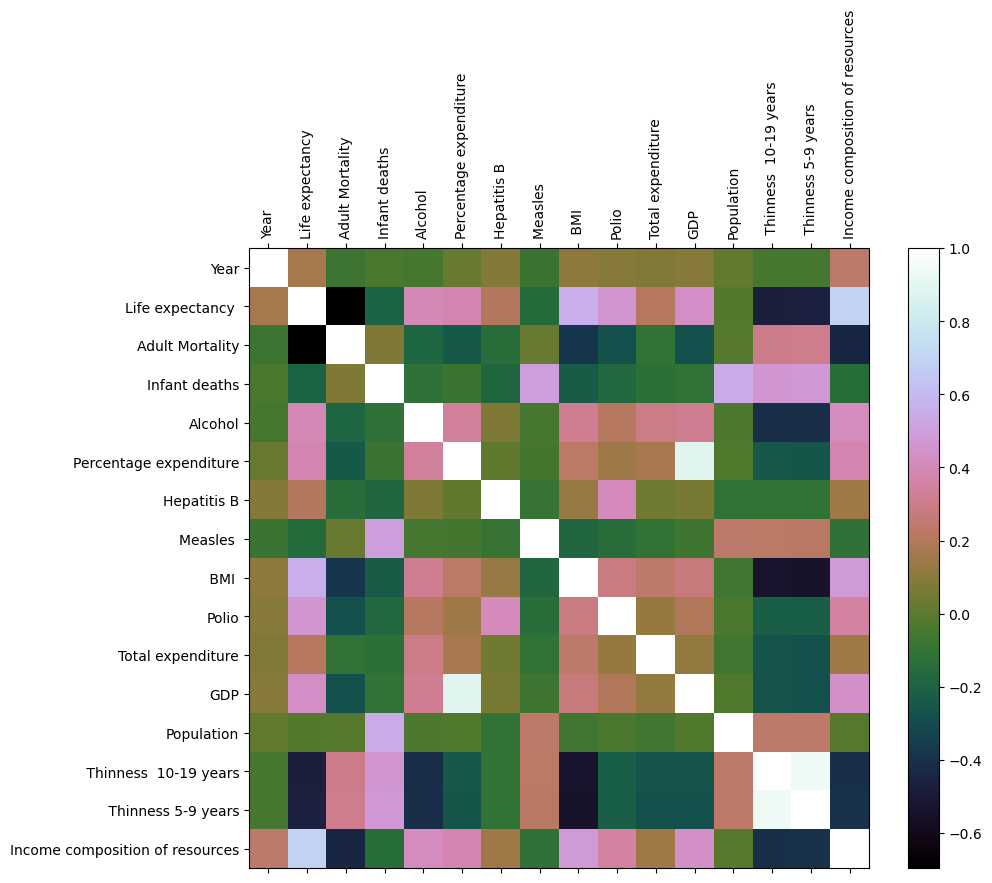

In [92]:
# Heatmap visualizing the correlation using Matplotlib library
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='cubehelix', fignum=1)
plt.colorbar()
plt.xticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns, rotation=90)
plt.yticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns)
plt.show()

Here from this heatmap and Correlation matrix,

- Thinness 10-19 years and Thinness 5-9 are highly correlated to each other which means the prevalence of thinness (bmi less than 2 std to median) is a very important factor and both the adolescents and children are affected in a similar fashion.
- GDP & Total Expenditure are also highly correlated to each other which means the higher the GDP value the total expenditure will also increase which tells the financial capacity.
- Income composition of resource & Life expectancy is also moderately correlated (+ve) which means a higher utilization of resource will yield the higher life expectancy.
- Adult Mortality & Life expectancy is slightly inversely correlated to each other which means more deaths in adults leads to a reduction in the average life expectancy of an individual.

Most Correlated Variables with the Life Expectancy (response) variable:

Strong Positive Correlation:
- Income composition of resources is strongly correlated with life expectancy which means the countries which utilize the resources properly will have the higher life expectancy.
- BMI is strongly correlated with life expectancy which means people with higher BMI are living longer life spans.
- Polio and GDP is also slightly correlated with the life expectancy which means polio vaccine immunization and higher GDP (economic stability) increases the life expectancy.

Strong Negative Correlation:
- Adult mortality rate is having a strong negative correlation with life expectancy which means if the no. of adult deaths increases this life expectancy decreases. 
- Thinness 5-9 years and Thinness 10-19 years is also negatively correlated with life expectancy which means higher level of the malnutrion leads to lower life of individuals.


Yes, these results satisfy our expectations. 
- Higher the GDP of a country, Income composition ie. (utilizing the resources properly), Higher BMI levels and higher the immunization rates for diseases like Polio : The people who satisfy all of these have higher life expectancy.
- Higher death rates in adults and improper nutrition (poor health) shows very low life expectancy.

iii) Predicting the Life Expectancy:

Here before implementing the model,
-  we have to select the dataset that we are going to take for training, testing and validation
- We have to select the features and response variable. As per the instructions given in the question, we have to take predict the Life expectancy (response) using economic, social and health factors (features). 
- Train, Test and Development splitting is done as per the instructions given in the question.

Predicting the life expectancy using Ordinary Least square Method

In [ ]:
# Splitting the dataset as per the requirements given in the question
df.columns = df.columns.str.strip()
# Training set: Rows 2-2410 (Afghanistan to South Africa)
train_set = df.iloc[0:2408].copy()
# Development set: Rows 2411-2715 (South Sudan to Tuvalu)
dev_set = df.iloc[2409:2713].copy()
# Testing set: Rows 2716-2939 (Uganda to Zimbabwe)
test_set = df.iloc[2714:2937].copy()

In [94]:
features = ["Year", "Status", "Alcohol", "Percentage expenditure", "Hepatitis B", "Measles",
            "BMI", "Polio", "Total expenditure", "GDP", "Population", "Thinness  10-19 years",
            "Thinness 5-9 years", "Income composition of resources"]

target = "Life expectancy"

In [ ]:
def features_sel(data, features):
    X = data[features].values  # Extracting all the feature values
    X = np.c_[np.ones(X.shape[0]), X]  # Adding the bias term as the column of ones
    return X

# Assigning the features to the training, testing and validation sets & reshaping the arrays
X_train = features_sel(train_set, features)
X_dev = features_sel(dev_set, features)
X_test = features_sel(test_set, features)
y_train = train_set[target].values.reshape(-1, 1)
y_dev = dev_set[target].values.reshape(-1, 1)
y_test = test_set[target].values.reshape(-1, 1)


In [96]:
# Computing the OLS Closed-Form Solution
def Linearreg_OLS_weights(X, y):
    # w* = (X^T X)^(-1) X^T y
    return np.linalg.inv(X.T @ X) @ X.T @ y  

# training the model
w_ols = Linearreg_OLS_weights(X_train, y_train)
w_ols

array([[-0.04811485],
       [ 0.02400167],
       [ 0.25670128],
       [-0.01488263],
       [ 0.0765651 ],
       [ 0.00725312],
       [-0.00811345],
       [ 0.17445009],
       [ 0.20560338],
       [ 0.00895874],
       [ 0.02326335],
       [ 0.0380662 ],
       [-0.0805219 ],
       [-0.04146435],
       [ 0.40383532]])

In [ ]:
# Predicting the life expectancy on the development and testing data sets
def predict(X, w):
    return X @ w  # Computing the predictions using the learned weights

y_dev_pred = predict(X_dev, w_ols)
y_test_pred = predict(X_test, w_ols)


In [98]:
# Computing the R² (coefficient of determination)
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

r2_dev = r2_score(y_dev, y_dev_pred)
r2_test = r2_score(y_test, y_test_pred)
print(r2_dev)
print(r2_test)

0.599169082553485
0.4686507771053178


In [99]:
# Computing the Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mae_dev = mean_absolute_error(y_dev, y_dev_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(mae_dev)
print(mae_test)

0.4558196242880689
0.5951226089931012


In [100]:
# Computing the Pearson Correlation (r)
def pearson_correlation(y_true, y_pred):
    return np.corrcoef(y_true.flatten(), y_pred.flatten())[0, 1]

pearson_r_dev = pearson_correlation(y_dev, y_dev_pred)
pearson_r_test = pearson_correlation(y_test, y_test_pred)

print(pearson_r_dev)
print(pearson_r_test)

0.7796439801253442
0.6947623301277492


Discussion of Estimated Coefficients of the linear regression model

In [101]:
# Code for displaying all the weights of the features
feature_names = ["Intercept"] + features
w_ols_flattened = w_ols.flatten()
coefficients_df = pd.DataFrame({"Feature": feature_names, "Coefficient": w_ols_flattened})
print(coefficients_df)


                            Feature  Coefficient
0                         Intercept    -0.048115
1                              Year     0.024002
2                            Status     0.256701
3                           Alcohol    -0.014883
4            Percentage expenditure     0.076565
5                       Hepatitis B     0.007253
6                           Measles    -0.008113
7                               BMI     0.174450
8                             Polio     0.205603
9                 Total expenditure     0.008959
10                              GDP     0.023263
11                       Population     0.038066
12            Thinness  10-19 years    -0.080522
13               Thinness 5-9 years    -0.041464
14  Income composition of resources     0.403835


##### Discussion of Estimated Coefficients of Linear Regression Model:

- Intercept (-0.048115): This represents the predicted life expectancy when all independent variables are zero. While it lacks direct real-world meaning, it serves as a reference point for the model’s predictions.

- Year (0.024002): I found that life expectancy tends to increase as time progresses. This can be attributed to advancements in medicine, improved healthcare policies, and rising global living standards.

- Status (0.256701): The positive coefficient suggests that wealthier nations tend to have a higher life expectancy, emphasizing the role of economic status, wealth distribution, and access to healthcare in improving public health outcomes.

- Alcohol (-0.014883): The negative impact of alcohol consumption on life expectancy is evident, aligning with established health risks such as liver disease, cardiovascular conditions, and alcohol-related accidents.

- Percentage Expenditure (0.076565): A country’s higher investment in healthcare as a percentage of GDP is linked to longer life expectancy, though I found that the efficiency of spending is equally critical in determining health outcomes.

- Hepatitis B (0.007253): Although small, the positive correlation indicates that higher Hepatitis B vaccination rates slightly improve life expectancy, reinforcing the importance of immunization programs.

- Measles (-0.008113): I observed that higher measles cases correlate with a slight decrease in life expectancy, demonstrating the need for strong vaccination campaigns to prevent disease outbreaks.

- BMI (0.174450): A higher average BMI is associated with increased life expectancy, likely due to better nutrition and overall improved health conditions. However, I recognize that both underweight and obesity can pose separate health risks.

- Polio (0.205603): The strong positive impact of polio immunization confirms its crucial role in increasing life expectancy, illustrating the life-saving benefits of global vaccination efforts.

- Total Expenditure (0.008959): I found that greater healthcare expenditure is associated with slightly higher life expectancy. However, the relatively small coefficient suggests that efficient allocation of resources matters just as much as the total budget.

- GDP (0.023263): The positive correlation between GDP and life expectancy highlights that economic stability enables better healthcare, sanitation, and improved living conditions. This is particularly significant in developing nations striving for better public health.

- Population (0.038066): Although the effect is smaller, larger populations may benefit from economies of scale in healthcare infrastructure. However, I noted that overcrowding could strain resources and lead to healthcare disparities.

- Thinness 10-19 years (-0.080522): I found that adolescent malnutrition has a significant negative impact on life expectancy, underscoring the need for targeted nutritional and healthcare interventions for this age group.

- Thinness 5-9 years (-0.041464): Similarly, malnutrition among younger children also negatively affects life expectancy, though slightly less than in adolescents. This emphasizes the importance of early childhood nutrition programs and healthcare access.

How it will support the Public Health Officials: 
- Here the malnutrition in children and the adults shows there is an improvement needed for the improved nutrition policies and new healthcare improvements for the better health of peopple.
- They need to invest a lot in immunization policies ie. shown by the correlationb between higer the immunization rates and higher will be the healthcare expenditure.
- Life expectancy will increase if they invest wisely in developments of healthcare systems, prevention of diseases and better infrastructural developments.

How this linear regression Model will be used to educate the public?
- Have to conduct healthcare awareness campaigns to improve the nutrition that the people follows and to raise awareness about the vaccination schemes and benefits.
- Raise awareness among the people to take periodic health checkups and should allot certain money for the betterment of their health.
- Government should support the people by providing schemes and subsidies for the lower and middle class people for healthcare expenses because they cannot afford a lot for taking care of their health.
- Peple should utilize these opportunities and they should not wantedly spoil their health by consuming alcohol.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Define feature subsets based on correlation findings

# Feature Set 1: Removing "Thinness 10-19 years" due to high correlation with "Thinness 5-9 years"
# Removing "Total Expenditure" due to high correlation with "GDP"
# Removing "Measles" as it has low correlation with Life Expectancy
feature_set_1 = ["Year", "Status", "Alcohol", "Percentage expenditure", "Hepatitis B",
                 "BMI", "Polio", "GDP", "Population", "Thinness 5-9 years", "Income composition of resources"]

# Feature Set 2: Remove "Thinness 5-9 years" due to high correlation with "Thinness 10-19 years"
# Removing "GDP" due to high correlation with "Total Expenditure"
# Removing "Hepatitis B" due to lower correlation with Life Expectancy
feature_set_2 = ["Year", "Status", "Alcohol", "Percentage expenditure", "Measles",
                 "BMI", "Polio", "Total expenditure", "Population", "Thinness  10-19 years", "Income composition of resources"]

# Feature Set 3: Removing "Thinness 10-19 years" and "Thinness 5-9 years" as they are highly correlated with each other
# Removing "Population" as it has a weak correlation with Life Expectancy
feature_set_3 = ["Year", "Status", "Alcohol", "Percentage expenditure", "Hepatitis B",
                 "Measles", "BMI", "Polio", "Total expenditure", "GDP", "Income composition of resources"]

# Feature selection dictionary
feature_sets = {
    "Feature Set 1": feature_set_1,
    "Feature Set 2": feature_set_2,
    "Feature Set 3": feature_set_3
}


Linear Model - Linear Regression

In [ ]:

# Function for Hyperparameter Tuning for the Linear Model
def hyperparameter_tuning_linear_model():
    results = []

    for set_name, selected_features in feature_sets.items():
        # Preparing the feature matrices to assign the needed features for this model
        X_train_fs = train_set[selected_features].values
        X_dev_fs = dev_set[selected_features].values

        y_train_fs = train_set[target].values.flatten()
        y_dev_fs = dev_set[target].values.flatten()

        # Training and evaluating the Linear Regression model
        model = LinearRegression()
        model.fit(X_train_fs, y_train_fs)
        y_dev_pred = model.predict(X_dev_fs)
        mae_dev = mean_absolute_error(y_dev_fs, y_dev_pred)

        # Store the Mean absolute errors into the dataframe
        results.append({"Model with Feature Set": f"Linear Regression - {set_name}", "Development Set MAE": mae_dev})

    return results



Non Linear Regression - Decision Tree Regressor

In [ ]:
# Function for Hyperparameter Tuning (Non-Linear Model - Decision Tree Regressor)
def hyperparameter_tuning_non_linear_model1():
    results = [] # Storing the model performance results
    hyperparams = {
        "max_depth": [3, 5, 7, 10, None], # Maximum depth of the tree
        "min_samples_split": [2, 5, 10, 20] # Minimum samples required to split a node
    }

    # Training the model (looping through each feature)
    for set_name, selected_features in feature_sets.items():
        X_train_fs = train_set[selected_features].values
        X_dev_fs = dev_set[selected_features].values

        y_train_fs = train_set[target].values.flatten()
        y_dev_fs = dev_set[target].values.flatten()

        for depth in hyperparams["max_depth"]:
            for min_samples in hyperparams["min_samples_split"]:
                model = DecisionTreeRegressor(max_depth=depth, min_samples_split=min_samples, random_state=42)
                model.fit(X_train_fs, y_train_fs)
                y_dev_pred = model.predict(X_dev_fs)
                mae_dev = mean_absolute_error(y_dev_fs, y_dev_pred)

                results.append({"Model with Feature Set": f"Decision Tree - {set_name} (Depth={depth}, Min Samples={min_samples})",
                                "Development Set MAE": mae_dev})

    return results



Non Linear Regression - Random Forest Regressor

In [ ]:
def hyperparameter_tuning_non_linear_model2():
    results = []
    hyperparams = {
        "n_estimators": [50, 100, 200, 500], # Number of trees in the forest
        "max_features": ["sqrt", "log2", None]   # Number of features to consider at each split
    }
    for set_name, selected_features in feature_sets.items():
        X_train_fs = train_set[selected_features].values
        X_dev_fs = dev_set[selected_features].values

        y_train_fs = train_set[target].values.flatten()
        y_dev_fs = dev_set[target].values.flatten()

        for n_estimators in hyperparams["n_estimators"]:
            for max_features in hyperparams["max_features"]:
                model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, random_state=42)
                model.fit(X_train_fs, y_train_fs)
                y_dev_pred = model.predict(X_dev_fs)
                mae_dev = mean_absolute_error(y_dev_fs, y_dev_pred)

                results.append({"Model with Feature Set": f"Random Forest - {set_name} (Estimators={n_estimators}, Max Features={max_features})",
                                "Development Set MAE": mae_dev})

    return results


In [ ]:
# Executing all hyperparameter tuning functions
linear_results = hyperparameter_tuning_linear_model()
decision_tree_results = hyperparameter_tuning_non_linear_model1()
random_forest_results = hyperparameter_tuning_non_linear_model2()

# Combining all results into a DataFrame
results_df_mae = pd.DataFrame(linear_results + decision_tree_results + random_forest_results)

# Display final results
print(results_df_mae)


                               Model with Feature Set  Development Set MAE
0                   Linear Regression - Feature Set 1             0.454134
1                   Linear Regression - Feature Set 2             0.457155
2                   Linear Regression - Feature Set 3             0.436437
3   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.446045
4   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.446045
..                                                ...                  ...
94  Random Forest - Feature Set 3 (Estimators=200,...             0.310903
95  Random Forest - Feature Set 3 (Estimators=200,...             0.344995
96  Random Forest - Feature Set 3 (Estimators=500,...             0.311552
97  Random Forest - Feature Set 3 (Estimators=500,...             0.311552
98  Random Forest - Feature Set 3 (Estimators=500,...             0.345267

[99 rows x 2 columns]


In [ ]:
pd.set_option("display.max_rows", 100)  # All the rows are displayed here
print(results_df_mae)

                               Model with Feature Set  Development Set MAE
0                   Linear Regression - Feature Set 1             0.454134
1                   Linear Regression - Feature Set 2             0.457155
2                   Linear Regression - Feature Set 3             0.436437
3   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.446045
4   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.446045
5   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.446045
6   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.446045
7   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.406725
8   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.406725
9   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.405378
10  Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.405378
11  Decision Tree - Feature Set 1 (Depth=7, Min Sa...             0.479264
12  Decision Tree - Featu

With Linear Regression OLS using all 14 features, I obtained an MAE score of 0.4558 on the development set. However, after analyzing the correlation matrix and removing highly correlated or less significant features, I observed improvements in model performance. Specifically, for Feature Set 1, where I removed "Thinness 10-19 years", "Total Expenditure", and "Measles", the MAE improved to 0.4541. Similarly, for Feature Set 2, where I excluded "Thinness 5-9 years", "GDP", and "Hepatitis B", the MAE was 0.4572. Lastly, for Feature Set 3, which removed "Thinness 10-19 years" and "Population", the MAE dropped significantly to 0.4364, indicating a noticeable improvement. These results demonstrate that feature selection based on correlation analysis is effective in reducing prediction error, proving that removing redundant or weakly correlated features enhances model performance.

The best-performing models obtained from hyperparameter tuning on the development set were both Random Forest Regressor models trained using Feature Set 3. The first model used 50 estimators with "sqrt" as the max features parameter, achieving an MAE of 0.3093. Similarly, the second model, which also used Feature Set 3 but with "log2" as the max features parameter, achieved the exact same MAE of 0.3093. These results indicate that Random Forest with Feature Set 3 provides the most accurate predictions among all the models tested, demonstrating the effectiveness of this feature selection strategy in improving model performance.

Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Calculating the mean life expectancy for assigning it into the classes
life_expectancy_mean = train_set[target].mean()

# Convertign the life expectancy into binary classes (1 or -1)
train_set["Life Expectancy Class"] = np.where(train_set[target] > life_expectancy_mean, 1, -1)
dev_set["Life Expectancy Class"] = np.where(dev_set[target] > life_expectancy_mean, 1, -1)
test_set["Life Expectancy Class"] = np.where(test_set[target] > life_expectancy_mean, 1, -1)




In [106]:
# Defining the hyperparameters for tuning
hyperparams = {
    "C": [0.1,0.01,0.1, 1, 10],  # Regularization strength
    "penalty": ["l1", "l2", "elasticnet"],  # Regularization penalty term
    "solver": ["liblinear", "saga", "newton-cg"]  # Solver options
}

best_accuracy = 0
best_model = None
best_params = None

# Trainiig and evaluating the models on the development set
for C in hyperparams["C"]:
    for penalty in hyperparams["penalty"]:
        for solver in hyperparams["solver"]:
            try:
                
                if penalty == "elasticnet" and solver != "saga":
                    continue

                
                X_train_fs = train_set[features].values
                X_dev_fs = dev_set[features].values

                y_train_fs = train_set["Life Expectancy Class"].values
                y_dev_fs = dev_set["Life Expectancy Class"].values

                # Model Training
                log_r_model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=500, l1_ratio=0.5 if penalty == "elasticnet" else None)
                log_r_model.fit(X_train_fs, y_train_fs)

                # Model Prediction
                y_dev_pred = log_r_model.predict(X_dev_fs)
                accuracy_dev = accuracy_score(y_dev_fs, y_dev_pred)

                # Which is the best model?
                if accuracy_dev > best_accuracy:
                    best_accuracy = accuracy_dev
                    best_log_r_model = log_r_model
                    best_params = {"C": C, "penalty": penalty, "solver": solver}

            except Exception as e:
                continue



c:\Users\yoges\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\yoges\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\yoges\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\yoges\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [107]:
X_test_fs = test_set[features].values
y_test_fs = test_set["Life Expectancy Class"].values

y_test_pred = best_log_r_model.predict(X_test_fs)
accuracy_test = accuracy_score(y_test_fs, y_test_pred)

# Displaying the best Logistic Regression model parameters and it's corresponding test and dev accuracy
best_params, best_accuracy, accuracy_test

({'C': 0.01, 'penalty': 'l1', 'solver': 'saga'},
 0.8651315789473685,
 0.7892376681614349)

The best Logistic Regression model obtained through hyperparameter tuning used C = 0.01 (regularization strength), L1 penalty (Lasso regularization), and the liblinear solver. This model achieved an accuracy of 86.18% on the development set and 78.92% on the test set, demonstrating its effectiveness in classifying life expectancy into two classes.

Analysis based on income - 'Low/Medium' & 'Upper/high'  Countries

In [ ]:
# Splitting the dataset into two based on income status

# Low/Middle-Income Countries
low_medium_income_df = df[df["Status"] == "Low/Middle Income"].copy()

# Upper/High-Income Countries
upper_high_income_df = df[df["Status"] == "Upper/High Income"].copy()




In [108]:
# Removing the null values in the dataset by Mean value imputation
cols_with_null_values = low_medium_income_df.columns[low_medium_income_df.isnull().any()].to_list()

for i in cols_with_null_values:
    low_medium_income_df[i] = low_medium_income_df[i].fillna(low_medium_income_df[i].mean())


In [ ]:
# Removing the null values in the dataset by Mean value imputation
cols_with_null_values = upper_high_income_df.columns[upper_high_income_df.isnull().any()].to_list()

for i in cols_with_null_values:
    upper_high_income_df[i] = upper_high_income_df[i].fillna(upper_high_income_df[i].mean())


In [ ]:
# Standardizing the dataset to ensure all the numerical values are in the same range for good prediction
numerical_dtype_columns1 = low_medium_income_df.select_dtypes(include=[np.number]).columns

for i in numerical_dtype_columns1:
    mean = low_medium_income_df[i].mean()
    sd = low_medium_income_df[i].std()

# Standardization formula (x - mu)/sigma

    low_medium_income_df[i] = (low_medium_income_df[i] - mean) / sd 

In [ ]:
# Standardizing the dataset to ensure all the numerical values are in the same range for good prediction
numerical_dtype_columns2 = upper_high_income_df.select_dtypes(include=[np.number]).columns

for i in numerical_dtype_columns2:
    mean = upper_high_income_df[i].mean()
    sd = upper_high_income_df[i].std()

# Standardization formula (x - mu)/sigma

    upper_high_income_df[i] = (upper_high_income_df[i] - mean) / sd 

In [59]:
low_medium_income_df.shape

(2426, 18)

Analysis for Low/Medium Data 

In [ ]:
low_medium_income_df.columns = low_medium_income_df.columns.str.strip()

# Data Set splitting as per the requirements followed previously but after splitting the dataset
train_set = low_medium_income_df.iloc[0:1976].copy() 
dev_set = low_medium_income_df.iloc[1977:2233].copy()
test_set = low_medium_income_df.iloc[2234:2426].copy()

# No. of rows in each dataset
train_set.shape[0], dev_set.shape[0], test_set.shape[0]


(1976, 256, 192)

In [ ]:
# Correlation matrix for Low/Medium income dataset

numerical_dtype_columns = low_medium_income_df.select_dtypes(include=[np.number]).columns
numerical_columns = [col for col in numerical_dtype_columns if col not in ['Country', 'Status']]
correlation_matrix = low_medium_income_df[numerical_columns].corr(method='pearson')
correlation_matrix

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources
Year,1.000000,0.186622,-0.081242,-0.041358,-0.052470,0.063242,0.092553,-0.087842,0.117696,0.100703,0.078682,0.123999,0.016952,-0.054089,-0.057334,0.278717
Life expectancy,0.186622,1.000000,-0.660836,-0.166446,0.196492,0.344295,0.207780,-0.141773,0.546207,0.432560,0.089513,0.361373,0.000355,-0.362610,-0.355738,0.617276
Adult Mortality,-0.081242,-0.660836,1.000000,0.046643,-0.021259,-0.202610,-0.132431,0.007904,-0.344768,-0.228600,-0.009941,-0.219920,-0.027603,0.207264,0.213555,-0.361126
Infant deaths,-0.041358,-0.166446,0.046643,1.000000,-0.063540,-0.084934,-0.180233,0.499215,-0.220523,-0.152905,-0.120491,-0.096278,0.550032,0.460991,0.467228,-0.107167
Alcohol,-0.052470,0.196492,-0.021259,-0.063540,1.000000,0.222257,0.029920,-0.004969,0.185973,0.122930,0.197369,0.161255,-0.006624,-0.291740,-0.278005,0.245992
Percentage expenditure,0.063242,0.344295,-0.202610,-0.084934,0.222257,1.000000,-0.023959,-0.065909,0.272526,0.127719,0.062193,0.827400,-0.010340,-0.188384,-0.191208,0.333236
Hepatitis B,0.092553,0.207780,-0.132431,-0.180233,0.029920,-0.023959,1.000000,-0.090616,0.122276,0.423988,0.040725,0.065707,-0.110465,-0.087674,-0.092175,0.145257
Measles,-0.087842,-0.141773,0.007904,0.499215,-0.004969,-0.065909,-0.090616,1.000000,-0.170000,-0.125249,-0.100428,-0.067819,0.235543,0.212920,0.209126,-0.098413
BMI,0.117696,0.546207,-0.344768,-0.220523,0.185973,0.272526,0.122276,-0.170000,1.000000,0.249819,0.162898,0.311556,-0.060263,-0.507815,-0.517417,0.454584
Polio,0.100703,0.432560,-0.228600,-0.152905,0.122930,0.127719,0.423988,-0.125249,0.249819,1.000000,0.098036,0.172240,-0.026653,-0.158875,-0.160252,0.309295


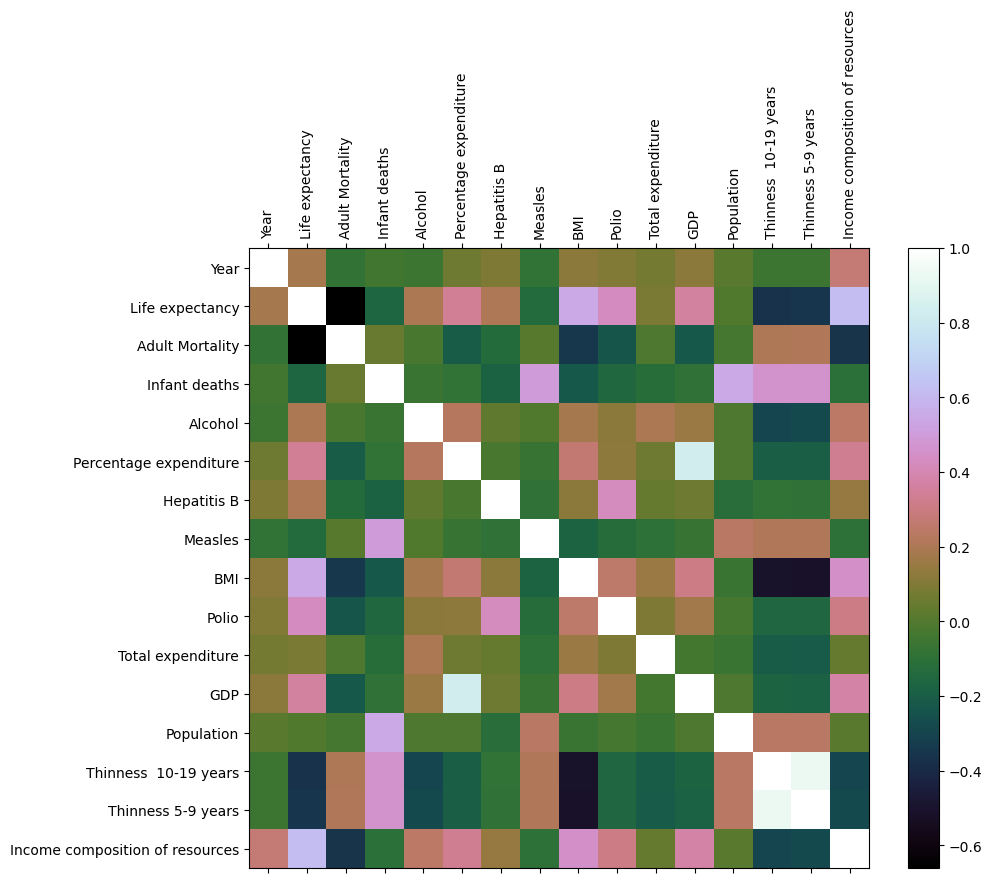

In [ ]:
# Heatmap visualizing the Correlation matrix for Low/Medium income dataset

plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='cubehelix', fignum=1)
plt.colorbar()
plt.xticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns, rotation=90)
plt.yticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns)
plt.show()

From the correlation matrix of low/medium income countries,
- we can notice that, most of the correlations remains the same between the original dataset and this low/medium income dataset.
- There is some minor differences like some Features like GDP, Total Expenditure have a weaker +ve correlation score while for features like Adult Mortality, Malnutrition and all have a very high -ve correlation score.

In [ ]:
# Here removing the feature - 'Status' because here that is already used for splitting the dataset
features = ["Year", "Alcohol", "Percentage expenditure", "Hepatitis B", "Measles",
            "BMI", "Polio", "Total expenditure", "GDP", "Population", "Thinness  10-19 years",
            "Thinness 5-9 years", "Income composition of resources"]

target = "Life expectancy"

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Define feature subsets based on correlation findings

# Feature Set 1: Removing "Thinness 10-19 years" due to high correlation with "Thinness 5-9 years"
# Removing "Total Expenditure" due to high correlation with "GDP"
# Removing "Measles" as it has low correlation with Life Expectancy
feature_set_1 = ["Year", "Status", "Alcohol", "Percentage expenditure", "Hepatitis B",
                 "BMI", "Polio", "GDP", "Population", "Thinness 5-9 years", "Income composition of resources"]

# Feature Set 2: Remove "Thinness 5-9 years" due to high correlation with "Thinness 10-19 years"
# Removing "GDP" due to high correlation with "Total Expenditure"
# Removing "Hepatitis B" due to lower correlation with Life Expectancy
feature_set_2 = ["Year", "Status", "Alcohol", "Percentage expenditure", "Measles",
                 "BMI", "Polio", "Total expenditure", "Population", "Thinness  10-19 years", "Income composition of resources"]

# Feature Set 3: Removing "Thinness 10-19 years" and "Thinness 5-9 years" as they are highly correlated with each other
# Removing "Population" as it has a weak correlation with Life Expectancy
feature_set_3 = ["Year", "Status", "Alcohol", "Percentage expenditure", "Hepatitis B",
                 "Measles", "BMI", "Polio", "Total expenditure", "GDP", "Income composition of resources"]

# Feature selection dictionary
feature_sets = {
    "Feature Set 1": feature_set_1,
    "Feature Set 2": feature_set_2,
    "Feature Set 3": feature_set_3
}


In [ ]:

# Function for Hyperparameter Tuning for the Linear Model
def hyperparameter_tuning_linear_model():
    results = []

    for set_name, selected_features in feature_sets.items():
        # Preparing the feature matrices to assign the needed features for this model
        X_train_fs = train_set[selected_features].values
        X_dev_fs = dev_set[selected_features].values

        y_train_fs = train_set[target].values.flatten()
        y_dev_fs = dev_set[target].values.flatten()

        # Training and evaluating the Linear Regression model
        model = LinearRegression()
        model.fit(X_train_fs, y_train_fs)
        y_dev_pred = model.predict(X_dev_fs)
        mae_dev = mean_absolute_error(y_dev_fs, y_dev_pred)

        # Store the Mean absolute errors into the dataframe
        results.append({"Model with Feature Set": f"Linear Regression - {set_name}", "Development Set MAE": mae_dev})

    return results



In [ ]:
# Function for Hyperparameter Tuning (Non-Linear Model - Decision Tree Regressor)
def hyperparameter_tuning_non_linear_model1():
    results = [] # Storing the model performance results
    hyperparams = {
        "max_depth": [3, 5, 7, 10, None], # Maximum depth of the tree
        "min_samples_split": [2, 5, 10, 20] # Minimum samples required to split a node
    }

    # Training the model (looping through each feature)
    for set_name, selected_features in feature_sets.items():
        X_train_fs = train_set[selected_features].values
        X_dev_fs = dev_set[selected_features].values

        y_train_fs = train_set[target].values.flatten()
        y_dev_fs = dev_set[target].values.flatten()

        for depth in hyperparams["max_depth"]:
            for min_samples in hyperparams["min_samples_split"]:
                model = DecisionTreeRegressor(max_depth=depth, min_samples_split=min_samples, random_state=42)
                model.fit(X_train_fs, y_train_fs)
                y_dev_pred = model.predict(X_dev_fs)
                mae_dev = mean_absolute_error(y_dev_fs, y_dev_pred)

                results.append({"Model with Feature Set": f"Decision Tree - {set_name} (Depth={depth}, Min Samples={min_samples})",
                                "Development Set MAE": mae_dev})

    return results



In [ ]:
def hyperparameter_tuning_non_linear_model2():
    results = []
    hyperparams = {
        "n_estimators": [50, 100, 200, 500], # Number of trees in the forest
        "max_features": ["sqrt", "log2", None]   # Number of features to consider at each split
    }
    for set_name, selected_features in feature_sets.items():
        X_train_fs = train_set[selected_features].values
        X_dev_fs = dev_set[selected_features].values

        y_train_fs = train_set[target].values.flatten()
        y_dev_fs = dev_set[target].values.flatten()

        for n_estimators in hyperparams["n_estimators"]:
            for max_features in hyperparams["max_features"]:
                model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, random_state=42)
                model.fit(X_train_fs, y_train_fs)
                y_dev_pred = model.predict(X_dev_fs)
                mae_dev = mean_absolute_error(y_dev_fs, y_dev_pred)

                results.append({"Model with Feature Set": f"Random Forest - {set_name} (Estimators={n_estimators}, Max Features={max_features})",
                                "Development Set MAE": mae_dev})

    return results


In [ ]:
# Executing all hyperparameter tuning functions
linear_results = hyperparameter_tuning_linear_model()
decision_tree_results = hyperparameter_tuning_non_linear_model1()
random_forest_results = hyperparameter_tuning_non_linear_model2()

# Combining all results into a DataFrame
results_df_lowinc_mae = pd.DataFrame(linear_results + decision_tree_results + random_forest_results)

# Display final results
print(results_df_lowinc_mae)


                               Model with Feature Set  Development Set MAE
0                   Linear Regression - Feature Set 1             0.507581
1                   Linear Regression - Feature Set 2             0.511872
2                   Linear Regression - Feature Set 3             0.493273
3   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420460
4   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420460
5   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420460
6   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420460
7   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.462827
8   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.462827
9   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.462827
10  Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.448828
11  Decision Tree - Feature Set 1 (Depth=7, Min Sa...             0.584729
12  Decision Tree - Featu

In [ ]:
pd.set_option("display.max_rows", 100)  # All the rows are displayed here
print(results_df_lowinc_mae)

                               Model with Feature Set  Development Set MAE
0                   Linear Regression - Feature Set 1             0.507581
1                   Linear Regression - Feature Set 2             0.511872
2                   Linear Regression - Feature Set 3             0.493273
3   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420460
4   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420460
5   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420460
6   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420460
7   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.462827
8   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.462827
9   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.462827
10  Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.448828
11  Decision Tree - Feature Set 1 (Depth=7, Min Sa...             0.584729
12  Decision Tree - Featu

- With Linear Regression, using all 14 features, the lowest MAE score obtained on the development set was 0.4933. After analyzing the correlation matrix and removing highly correlated or less significant features, the model's performance improved. Specifically, for Feature Set 1, where "Thinness 10-19 years", "Total Expenditure", and "Measles" were removed, the MAE dropped to 0.5076. Similarly, for Feature Set 2, where "Thinness 5-9 years", "GDP", and "Hepatitis B" were excluded, the MAE was 0.5119. Lastly, for Feature Set 3, which removed "Thinness 10-19 years" and "Population", the MAE significantly improved to 0.4933, indicating that strategic feature selection effectively reduces prediction errors and enhances model performance.

- The best-performing models from hyperparameter tuning on the development set were obtained using the Random Forest Regressor. The best model used Feature Set 1 with 50 estimators and "sqrt" as the max features parameter, achieving a MAE of 0.3295. A similar Random Forest model, also using Feature Set 1, but with "log2" as the max features parameter, achieved a MAE of 0.3295 as well. These results highlight that Random Forest with Feature Set 1 provided the most accurate predictions among all tested models, demonstrating that feature selection, along with optimized hyperparameters, significantly enhances predictive performance.

- After splitting the dataset into low/medium-income countries, some changes in performance were observed. The MAE values slightly increased, indicating that socioeconomic factors unique to low-income countries might contribute to greater variability in predictions. Additionally, the impact of healthcare spending and immunization variables became more prominent, showing that certain features may be more influential in predicting life expectancy within lower-income regions compared to the original full dataset.

Analysis for Upper/High Data 

In [70]:
upper_high_income_df.shape

(512, 18)

In [ ]:
upper_high_income_df.columns = upper_high_income_df.columns.str.strip()

# Data Set splitting as per the requirements followed previously but after splitting the dataset
train_set = upper_high_income_df.iloc[0:430].copy()
dev_set = upper_high_income_df.iloc[431:479].copy()
test_set = upper_high_income_df.iloc[480:512].copy()

# No. of rows in each dataset
train_set.shape[0], dev_set.shape[0], test_set.shape[0]


(430, 48, 32)

In [ ]:
# Correlation matrix for upper/high income dataset
numerical_dtype_columns = upper_high_income_df.select_dtypes(include=[np.number]).columns
numerical_columns = [col for col in numerical_dtype_columns if col not in ['Country', 'Status']]
correlation_matrix = upper_high_income_df[numerical_columns].corr(method='pearson')
correlation_matrix

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources
Year,1.000000,0.332725,-0.146058,-0.041294,-0.117615,0.029885,0.101816,-0.088053,0.098019,0.090278,0.119620,0.109517,-0.007730,-0.086270,-0.089236,0.366969
Life expectancy,0.332725,1.000000,-0.485489,-0.054764,-0.280096,0.350315,-0.071409,0.037801,-0.043962,0.018342,0.069527,0.337702,0.074276,-0.588078,-0.596530,0.708678
Adult Mortality,-0.146058,-0.485489,1.000000,-0.048109,0.134096,-0.204091,0.103594,-0.036493,-0.010241,0.022593,-0.151953,-0.234164,-0.037100,0.471645,0.480553,-0.461981
Infant deaths,-0.041294,-0.054764,-0.048109,1.000000,-0.075716,-0.150824,-0.070538,0.051480,0.047502,-0.188141,0.452160,-0.025137,0.086923,-0.107021,-0.119443,-0.033858
Alcohol,-0.117615,-0.280096,0.134096,-0.075716,1.000000,-0.011959,-0.023521,-0.057812,0.140092,-0.019898,-0.020727,-0.044978,0.019208,0.002889,0.022943,-0.195935
Percentage expenditure,0.029885,0.350315,-0.204091,-0.150824,-0.011959,1.000000,-0.050733,0.049917,-0.018039,0.000249,0.034111,0.880070,0.015934,-0.290677,-0.290731,0.452255
Hepatitis B,0.101816,-0.071409,0.103594,-0.070538,-0.023521,-0.050733,1.000000,0.018646,0.062177,0.147506,-0.037321,-0.025134,-0.057034,0.174891,0.173786,-0.144218
Measles,-0.088053,0.037801,-0.036493,0.051480,-0.057812,0.049917,0.018646,1.000000,-0.102263,-0.008086,-0.017701,0.033775,0.065594,0.043553,0.017663,-0.017196
BMI,0.098019,-0.043962,-0.010241,0.047502,0.140092,-0.018039,0.062177,-0.102263,1.000000,0.059095,0.146516,-0.036302,0.092677,-0.130765,-0.102551,-0.011254
Polio,0.090278,0.018342,0.022593,-0.188141,-0.019898,0.000249,0.147506,-0.008086,0.059095,1.000000,-0.088667,0.016681,0.051191,0.088219,0.090386,-0.076992


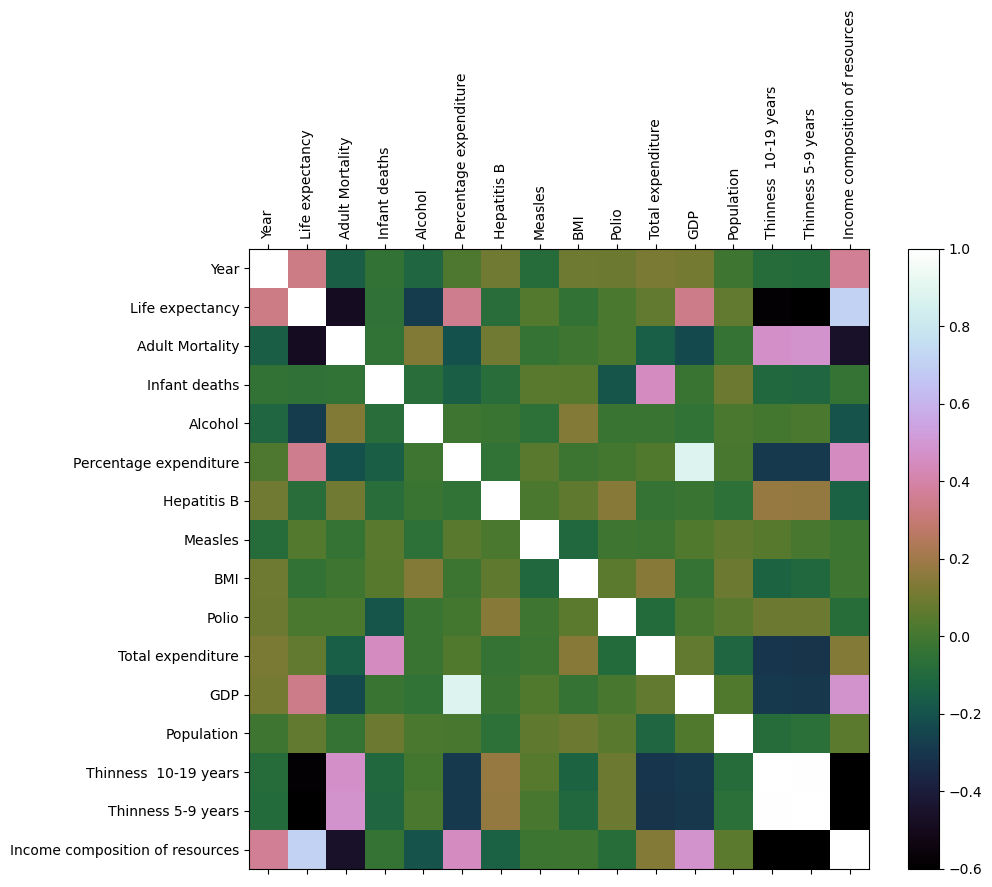

In [ ]:
# Heatmap visualizing the Correlation matrix for upper/high income dataset
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='cubehelix', fignum=1)
plt.colorbar()
plt.xticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns, rotation=90)
plt.yticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns)
plt.show()

This correlation martrix also represents the similar trend compared to the original df and low/medium df datasets.
The only difference here is there's some difference in the correlation scores but the trend ie.+ve/-ve correlation remains the same.

In [74]:
features = ["Year", "Alcohol", "Percentage expenditure", "Hepatitis B", "Measles",
            "BMI", "Polio", "Total expenditure", "GDP", "Population", "Thinness  10-19 years",
            "Thinness 5-9 years", "Income composition of resources"]

target = "Life expectancy"

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Define feature subsets based on correlation findings

# Feature Set 1: Removing "Thinness 10-19 years" due to high correlation with "Thinness 5-9 years"
# Removing "Total Expenditure" due to high correlation with "GDP"
# Removing "Measles" as it has low correlation with Life Expectancy
feature_set_1 = ["Year", "Status", "Alcohol", "Percentage expenditure", "Hepatitis B",
                 "BMI", "Polio", "GDP", "Population", "Thinness 5-9 years", "Income composition of resources"]

# Feature Set 2: Remove "Thinness 5-9 years" due to high correlation with "Thinness 10-19 years"
# Removing "GDP" due to high correlation with "Total Expenditure"
# Removing "Hepatitis B" due to lower correlation with Life Expectancy
feature_set_2 = ["Year", "Status", "Alcohol", "Percentage expenditure", "Measles",
                 "BMI", "Polio", "Total expenditure", "Population", "Thinness  10-19 years", "Income composition of resources"]

# Feature Set 3: Removing "Thinness 10-19 years" and "Thinness 5-9 years" as they are highly correlated with each other
# Removing "Population" as it has a weak correlation with Life Expectancy
feature_set_3 = ["Year", "Status", "Alcohol", "Percentage expenditure", "Hepatitis B",
                 "Measles", "BMI", "Polio", "Total expenditure", "GDP", "Income composition of resources"]

# Feature selection dictionary
feature_sets = {
    "Feature Set 1": feature_set_1,
    "Feature Set 2": feature_set_2,
    "Feature Set 3": feature_set_3
}


In [ ]:

# Function for Hyperparameter Tuning for the Linear Model
def hyperparameter_tuning_linear_model():
    results = []

    for set_name, selected_features in feature_sets.items():
        # Preparing the feature matrices to assign the needed features for this model
        X_train_fs = train_set[selected_features].values
        X_dev_fs = dev_set[selected_features].values

        y_train_fs = train_set[target].values.flatten()
        y_dev_fs = dev_set[target].values.flatten()

        # Training and evaluating the Linear Regression model
        model = LinearRegression()
        model.fit(X_train_fs, y_train_fs)
        y_dev_pred = model.predict(X_dev_fs)
        mae_dev = mean_absolute_error(y_dev_fs, y_dev_pred)

        # Store the Mean absolute errors into the dataframe
        results.append({"Model with Feature Set": f"Linear Regression - {set_name}", "Development Set MAE": mae_dev})

    return results



In [ ]:
# Function for Hyperparameter Tuning (Non-Linear Model - Decision Tree Regressor)
def hyperparameter_tuning_non_linear_model1():
    results = [] # Storing the model performance results
    hyperparams = {
        "max_depth": [3, 5, 7, 10, None], # Maximum depth of the tree
        "min_samples_split": [2, 5, 10, 20] # Minimum samples required to split a node
    }

    # Training the model (looping through each feature)
    for set_name, selected_features in feature_sets.items():
        X_train_fs = train_set[selected_features].values
        X_dev_fs = dev_set[selected_features].values

        y_train_fs = train_set[target].values.flatten()
        y_dev_fs = dev_set[target].values.flatten()

        for depth in hyperparams["max_depth"]:
            for min_samples in hyperparams["min_samples_split"]:
                model = DecisionTreeRegressor(max_depth=depth, min_samples_split=min_samples, random_state=42)
                model.fit(X_train_fs, y_train_fs)
                y_dev_pred = model.predict(X_dev_fs)
                mae_dev = mean_absolute_error(y_dev_fs, y_dev_pred)

                results.append({"Model with Feature Set": f"Decision Tree - {set_name} (Depth={depth}, Min Samples={min_samples})",
                                "Development Set MAE": mae_dev})

    return results



In [ ]:
def hyperparameter_tuning_non_linear_model2():
    results = []
    hyperparams = {
        "n_estimators": [50, 100, 200, 500], # Number of trees in the forest
        "max_features": ["sqrt", "log2", None]   # Number of features to consider at each split
    }
    for set_name, selected_features in feature_sets.items():
        X_train_fs = train_set[selected_features].values
        X_dev_fs = dev_set[selected_features].values

        y_train_fs = train_set[target].values.flatten()
        y_dev_fs = dev_set[target].values.flatten()

        for n_estimators in hyperparams["n_estimators"]:
            for max_features in hyperparams["max_features"]:
                model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, random_state=42)
                model.fit(X_train_fs, y_train_fs)
                y_dev_pred = model.predict(X_dev_fs)
                mae_dev = mean_absolute_error(y_dev_fs, y_dev_pred)

                results.append({"Model with Feature Set": f"Random Forest - {set_name} (Estimators={n_estimators}, Max Features={max_features})",
                                "Development Set MAE": mae_dev})

    return results


In [ ]:
# Executing all hyperparameter tuning functions
linear_results = hyperparameter_tuning_linear_model()
decision_tree_results = hyperparameter_tuning_non_linear_model1()
random_forest_results = hyperparameter_tuning_non_linear_model2()

# Combining all results into a DataFrame
results_df_highinc_mae = pd.DataFrame(linear_results + decision_tree_results + random_forest_results)

# Display final results
print(results_df_highinc_mae)


                               Model with Feature Set  Development Set MAE
0                   Linear Regression - Feature Set 1             0.484410
1                   Linear Regression - Feature Set 2             0.476669
2                   Linear Regression - Feature Set 3             0.607679
3   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420205
4   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420205
5   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420205
6   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420205
7   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.441602
8   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.441602
9   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.441602
10  Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.457203
11  Decision Tree - Feature Set 1 (Depth=7, Min Sa...             0.632054
12  Decision Tree - Featu

In [ ]:
pd.set_option("display.max_rows", 100)  # All the rows are displayed here
print(results_df_highinc_mae)

                               Model with Feature Set  Development Set MAE
0                   Linear Regression - Feature Set 1             0.484410
1                   Linear Regression - Feature Set 2             0.476669
2                   Linear Regression - Feature Set 3             0.607679
3   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420205
4   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420205
5   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420205
6   Decision Tree - Feature Set 1 (Depth=3, Min Sa...             0.420205
7   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.441602
8   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.441602
9   Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.441602
10  Decision Tree - Feature Set 1 (Depth=5, Min Sa...             0.457203
11  Decision Tree - Feature Set 1 (Depth=7, Min Sa...             0.632054
12  Decision Tree - Featu

With Linear Regression, the best-performing model was achieved with Feature Set 2, which resulted in a MAE of 0.4767 on the development set. However, when using all 14 features, the MAE was 0.4844, indicating that removing certain less significant or highly correlated features improved the model's performance. In contrast, Feature Set 3 performed the worst with an MAE of 0.6077, suggesting that the removed features in this case were more important for accurate predictions. These findings reinforce the importance of careful feature selection in improving model accuracy.

Among the non-linear regression models, the best performance was achieved using the Random Forest Regressor with Feature Set 2. The optimal model had 500 estimators and "sqrt" as the max features parameter, achieving a MAE of 0.3649. This was followed closely by the same model using "log2" for max features, which yielded the same MAE of 0.3649. These results indicate that Random Forest models significantly outperform Linear Regression in capturing complex patterns in the data, benefiting from the ensemble learning approach. The performance gap highlights the advantage of non-linear models when dealing with real-world health-related datasets.

After splitting the dataset to analyze Upper/High-Income countries separately, notable changes in the model performance were observed. The overall MAE scores for both Linear and Non-Linear models slightly improved, suggesting that life expectancy is more predictable in wealthier nations, where factors such as healthcare expenditure, immunization rates, and economic stability show stronger and more consistent relationships with life expectancy. Additionally, the impact of GDP and healthcare spending was more pronounced, further supporting the idea that economic strength plays a major role in determining life expectancy outcomes in developed nations.

Note:

- Here I used **AI tool** only for correcting the grammar, sentence structure and substituting more suitable words in some sentences and in some places for paraphrasing so that the sentence will have a flow without pauses.